# Important Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('PCA_practice_dataset.csv', header=None)
data = df.to_numpy()
print(data.shape)

(8042, 35)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.03125,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.12500,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.18750,0.495146,0.515789
1,-0.03125,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.03125,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.12500,0.533981,0.368421
2,-0.03125,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.03125,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.03125,0.650485,0.452632
3,-0.03125,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.09375,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.25000,0.203883,0.094737
4,-0.03125,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.25000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.28125,0.495146,0.410526


In [4]:
data_matrix = np.matrix(data)
print(data_matrix.shape)

(8042, 35)


In [5]:
data_matrix_t = np.matrix(data_matrix.T)
print(data_matrix_t.shape)

(35, 8042)


# Finding Eigen

In [6]:
cov = np.cov(data_matrix)
print(cov.shape)

(8042, 8042)


In [7]:
cov = np.cov(data_matrix_t)
print(cov.shape)
eig_val, eig_vec = np.linalg.eig(cov)

(35, 35)


# Right Singular Vectors

In [8]:
eigen_vec_ls = []
for i in range(eig_vec.shape[1]):
    eig1 = data@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))

In [9]:
eig_val

array([3.51226699e+00, 1.95974767e+00, 2.46254447e-01, 1.37596099e-01,
       9.40647796e-02, 8.15808436e-02, 5.76794314e-02, 2.41536413e-02,
       1.95698085e-02, 1.53535147e-02, 1.33368429e-02, 8.41289295e-03,
       7.50956515e-03, 7.17790489e-03, 7.01373935e-03, 6.87257345e-03,
       5.07969739e-03, 4.54477434e-03, 4.20149896e-03, 3.63490246e-03,
       3.50321157e-03, 3.24484593e-03, 1.08631748e-03, 2.96356841e-03,
       2.83614520e-03, 2.69172614e-03, 1.30121655e-03, 1.44106622e-03,
       1.50648368e-03, 1.66002817e-03, 1.75646629e-03, 1.86627842e-03,
       1.97418260e-03, 2.25562721e-03, 2.15169295e-03])

In [10]:
eigen_vec_ls

[array([ 0.2629715 ,  0.29355157,  0.2752796 , ..., -0.05641767,
         0.01772987, -0.01232639]),
 array([ 0.59127675,  0.58542864,  0.40030446, ..., -1.01226118,
        -0.83703822, -1.04193292]),
 array([-4.70972047, -3.73284221, -4.89537733, ..., -1.49140278,
        -1.7570309 , -1.63552726]),
 array([ 0.55588636,  1.78550606,  0.17342257, ..., -1.55852628,
         1.64848411,  0.70929326]),
 array([ 1.74335619,  0.34245138, -2.81805252, ..., -2.37121403,
         2.36740885,  3.25321676]),
 array([ 0.32195603, -0.09454092,  4.39440218, ...,  1.46065336,
        -0.11473181,  0.29592032]),
 array([-3.7313987 ,  0.42694147, -8.43114792, ..., -1.49352717,
        -0.7148587 , -1.92325494]),
 array([-5.45558253,  2.64463896, -3.65113933, ...,  0.89717826,
        -0.85064956, -3.76752371]),
 array([-0.97904388, -3.10206044, -4.40405858, ..., -5.46393269,
        -3.16931688, -2.84668347]),
 array([-12.96899219,   7.77424423,  12.49423304, ...,  -0.85517739,
          1.7575105 , 

## Threshold List

In [11]:
threshold_list = np.arange(0.90, 0.98, 0.01)
print(threshold_list)

[0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97]


# Finding Principal

In [12]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)

principal_eig_vec = []
principal_eig_val = []

for t in threshold_list:
    temp_sum = 0
    temp_val = []
    temp_vec = []
    i=0
    while(temp_sum<t*eig_val_sum):
        temp_vec.append(eigen_vec_ls[sort_idx[i]])
        temp_val.append(eig_val[sort_idx[i]])
        temp_sum += eig_val[sort_idx[i]]
        i += 1
    print("Number of components is {}".format(i) + " With threshold : %.2f"%t)
    principal_eig_vec.append(temp_vec)
    principal_eig_val.append(temp_val)

Number of components is 3 With threshold : 0.90
Number of components is 3 With threshold : 0.91
Number of components is 4 With threshold : 0.92
Number of components is 4 With threshold : 0.93
Number of components is 5 With threshold : 0.94
Number of components is 5 With threshold : 0.95
Number of components is 6 With threshold : 0.96
Number of components is 7 With threshold : 0.97


# Scree Plot

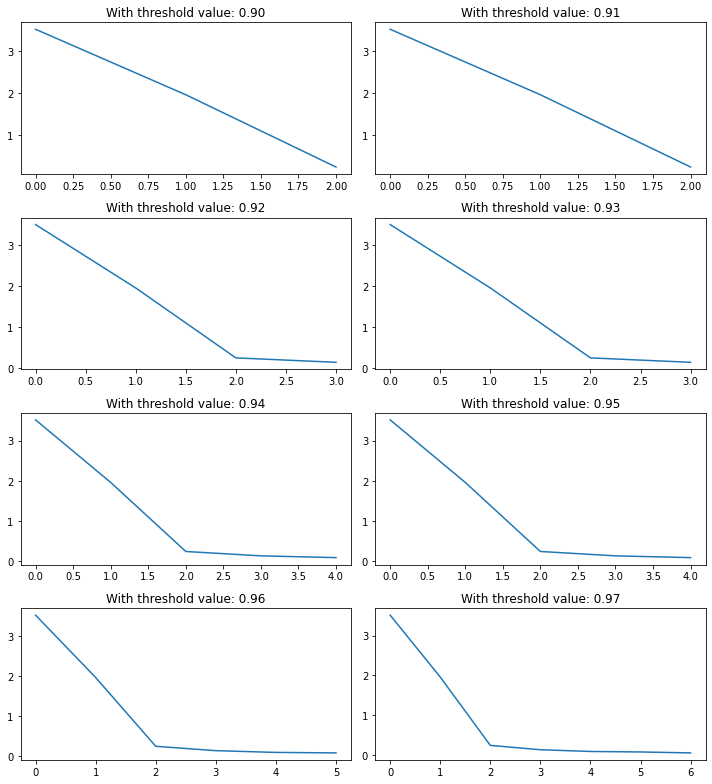

In [13]:
fig = plt.figure(figsize=(10, 11))
for i in range(len(principal_eig_vec)):
    ax = fig.add_subplot(4, 2, i+1)
    ax.title.set_text("With threshold value: %.2f"%threshold_list[i])
    ax.plot(principal_eig_val[i])

plt.tight_layout()